In [1]:
import numpy as np # used for numerical operations
import matplotlib.pyplot as plt # used for plotting
from scipy.stats import norm # used to generate Gaussian data

# Part 1

In [2]:
def draw_normal_data(n, mean, variance):
    """
    Draw samples from a standard normal distribution and compute the corresponding probability density function.

    Parameters
        - n (int): Number of data points to draw from the normal distribution.
        - mean (int): Mean of the data.
        - variance (int): Variance of the data.

    Returns
        - x (array-like): Samples drawn from the standard normal distribution.
    """
    # set the random seed for reproducibility
    np.random.seed(0)

    std_dev = np.sqrt(variance)
    x = np.random.normal(mean, std_dev, n)
    return x

In [45]:
# define number of points
n = 100
# draw normal data
data = draw_normal_data(n=n, mean=0, variance=1)
# define the number of grid points x
num_x = 1000

## (a) Computing KDE with rectangle kernel with different bandwidth values

In [3]:
def rectangle_kernel(x):
    """
    Compute the value of the rectangle kernel function.

    Parameters
        - x (array-like): Input value or array.

    Returns
        - y (array-like): Value of the rectangle kernel function evaluated at each point of x.
    """
    return np.where(np.abs(x) <= 1, 0.5, 0)

In [4]:
def kde(data, h, kernel, num_x, x_0):
    """
    Compute the Kernel Density Estimation (KDE) for a given dataset.
    For each point on the grid, it calculates the KDE by applying the kernel function to each data point,
        adjusting for the bandwidth parameter, and then averaging the results.

    Parameters
        - data (array-like): The input data for which KDE is computed.
        - h (float): The bandwidth parameter controlling the smoothness of the estimation.
        - kernel (function): The kernel function used for KDE.
        - num_x (int): Number of points for the x grid.
        - x_0 (float): Target point x_0
    
    Returns
        - kde_values (array-like): The KDE values.
    """
    # compute KDE just for single target point x_0
    if x_0 is not None:
        # compute KDE for a single point x_0
        kde_values = np.vectorize(kernel)((x_0 - data) / h).sum() / (len(data) * h)
        return kde_values
    # define evenly distributed grid of points
    x = np.linspace(np.min(data), np.max(data), num_x)
    # vectorize the kernel function for efficient application
    vkernel = np.vectorize(kernel)
    # calculate kernel densities for all grid points x
    kde_values = vkernel((x[:, np.newaxis] - data) / h).sum(axis=1) / (len(data) * h)
    return kde_values

In [5]:
def plot_kde(data, H, kernel, kernel_name, num_x, x_0, plot_name, y_lim):
    """
    Generate plots of Kernel Density Estimation (KDE) with a given kernel for different bandwidth values.
    The x-axis represents the range of the data extended by 5% on both sides.
    The y-axis represents the estimated density values.
    
    Parameters
        - data (array-like): Input data for which KDE is computed.
        - H (list): List of bandwidth values to use for the KDE.
        - kernel (func) : Kernel function.
        - kernel_name (str): Name of the kernel.
        - num_x (int): Number of points for the x grid.
        - x_0 (float) : Target point x_0
        - plot_name (str): name of the plot file.
        - y_lim (float): limit value of y on the plot

    Returns
        - None
    """
    # define an array of evenly spaced values used for plotting the KDE curve
    x_plot = np.linspace(np.min(data) * 1.05, np.max(data) * 1.05, num_x)
    # set up figure and axis
    fig, axs = plt.subplots(1, len(H), figsize=(20, 8))
    # plot KDE for each bandwidth value
    for i, h in enumerate(H):
        # compute KDE for current bandwidth
        kde_values = kde(data, h, kernel, num_x, x_0)
        # plot KDE plot
        axs[i].hist(data, density=True, alpha=0.2, bins=20, rwidth=0.9)
        axs[i].plot(x_plot, kde_values, label=f"h={h}", linewidth=1)
        axs[i].set_title(f"Bandwidth h={h}", fontsize=12)
        axs[i].set_xlabel("X", fontsize=12)
        axs[i].set_ylabel("Density", fontsize=12)
        axs[i].legend()
        axs[i].grid(True)
        axs[i].set_ylim(0, y_lim)

    plt.suptitle(f"Kernel Density Estimation with {kernel_name} Kernel for Different Bandwidths", fontsize=14)
    plt.tight_layout()
    plt.savefig(plot_name)
    plt.show()

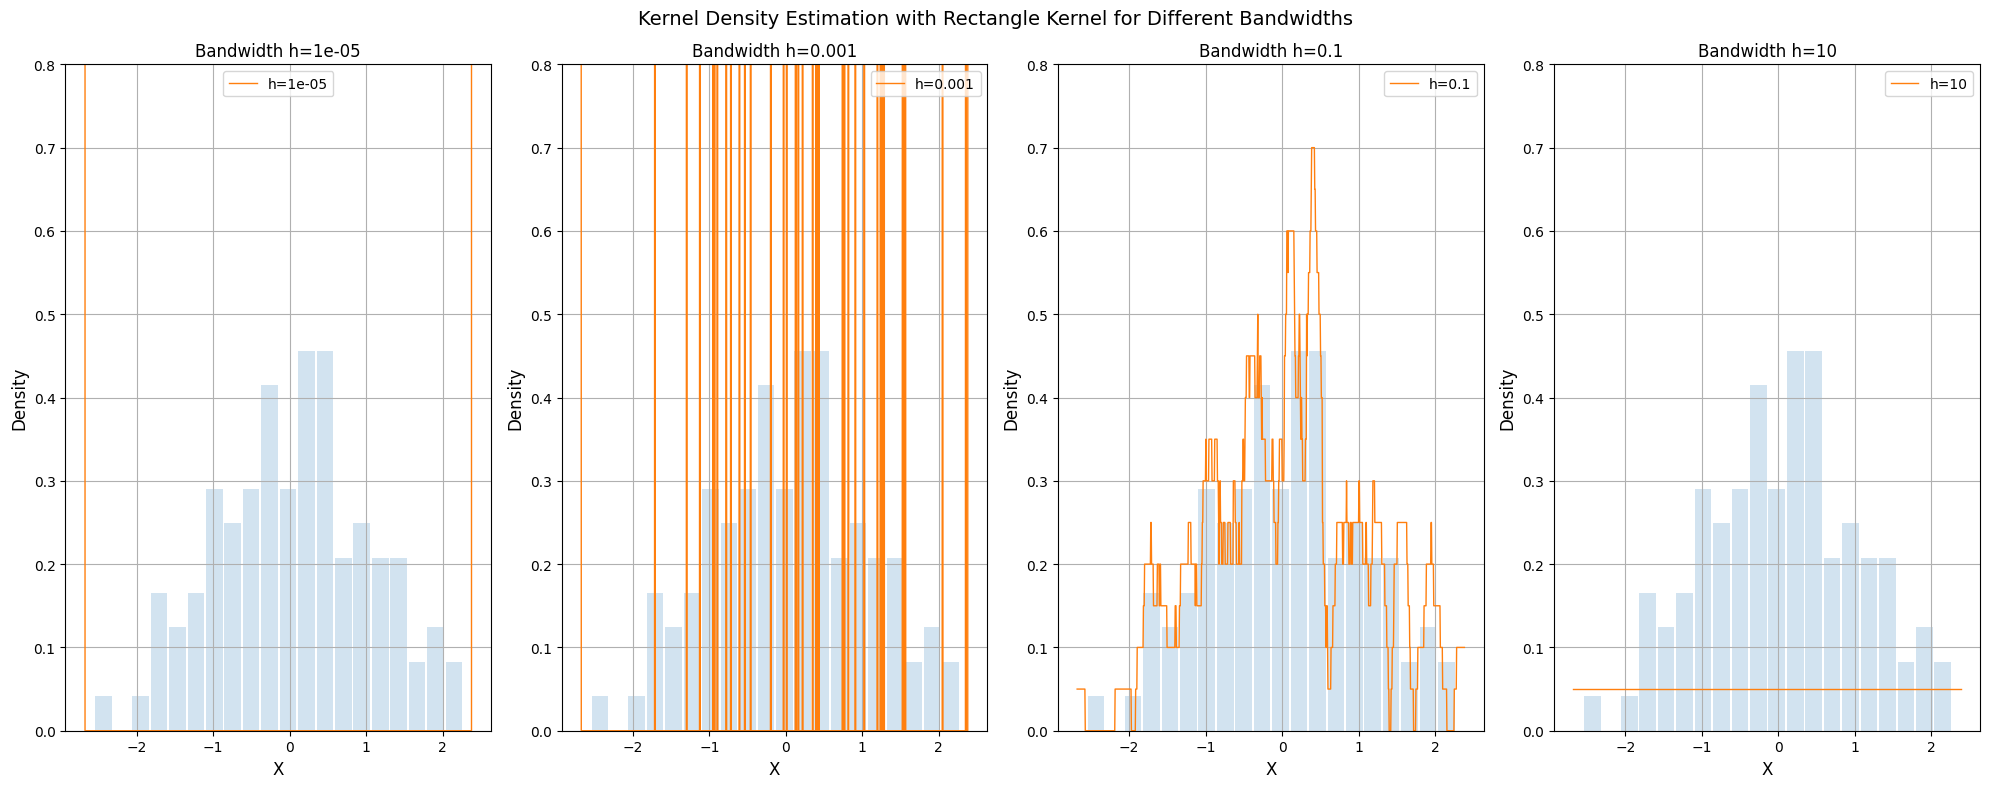

In [49]:
# define bandwidth values
H = [1e-5, 1e-3, 1e-1, 10]
# compute & plot KDE
plot_kde(
    data=data, 
    H=H, 
    kernel=rectangle_kernel,
    kernel_name="Rectangle",
    num_x=num_x,
    x_0=None,
    plot_name="1_a_KDE-rectangle.jpg",
    y_lim=0.8
)

### Conclusion

- We can notice that by using rectangle kernel in KDE, it provides rough, coarse approximation of the true distribution.
- Smaller bandwidth (`h=1e-5, h=1e-3`) captures individual data points, but fails to capture the overall distribution (as `h -> 0`, each individual point in KDE transforms to the Dirac measure).
- Larger bandwidths (e.g. `h = 10`) smoothes out the distribution (decreases variance of the estimator) but loses details (we notice just straight line as KDE).
- Intermediate bandwidths (`h=1e-1`) provide a balance between bias-variance tradeoff, thus better estimate the true distribution of the data.


## (b) Repeating the experiment with n=10000

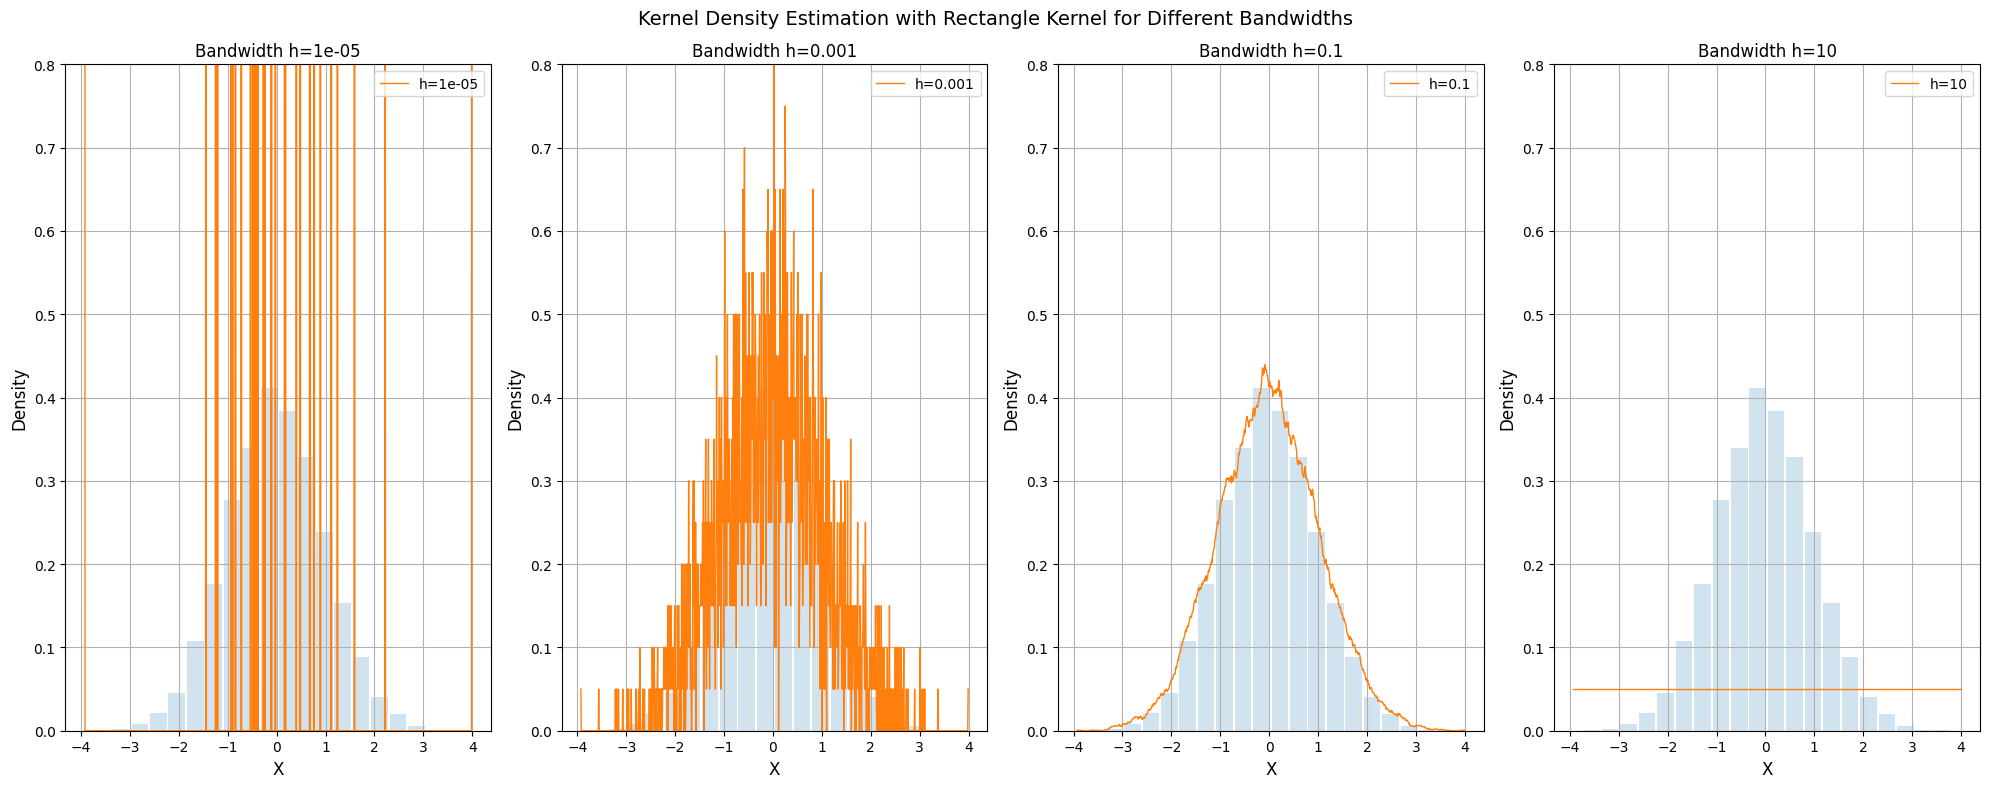

In [50]:
# define bandwidth values
H = [1e-5, 1e-3, 1e-1, 10]
# define number of points
n = 10000
# draw normal data
data = draw_normal_data(n=n, mean=0, variance=1)
# compute & plot KDE
plot_kde(
    data=data, 
    H=H, 
    kernel=rectangle_kernel,
    kernel_name="Rectangle",
    num_x=num_x,
    x_0=None,
    plot_name="1_b_KDE-rectangle.jpg",
    y_lim=0.8
)

### Conclusion

- With more data points, the KDE approximates the true density better for all bandwidth values (except extreme high and extreme low values of the bandwidth).
- This result is especially noticable with `h=0.1`, where KDE almost exactly approximates the true distribution.


## (c) Repeat the experiments with the Gaussian kernel

In [6]:
def gaussian_kernel(x):
    """
    Compute the value of the Gaussian kernel function.

    Parameters
        - x (array-like): Input value or array.

    Returns
        - y (array-like): Value of the Gaussian kernel function evaluated at each point of x.
    """
    return 1 / np.sqrt(2 * np.pi) * np.exp(-x**2 / 2)

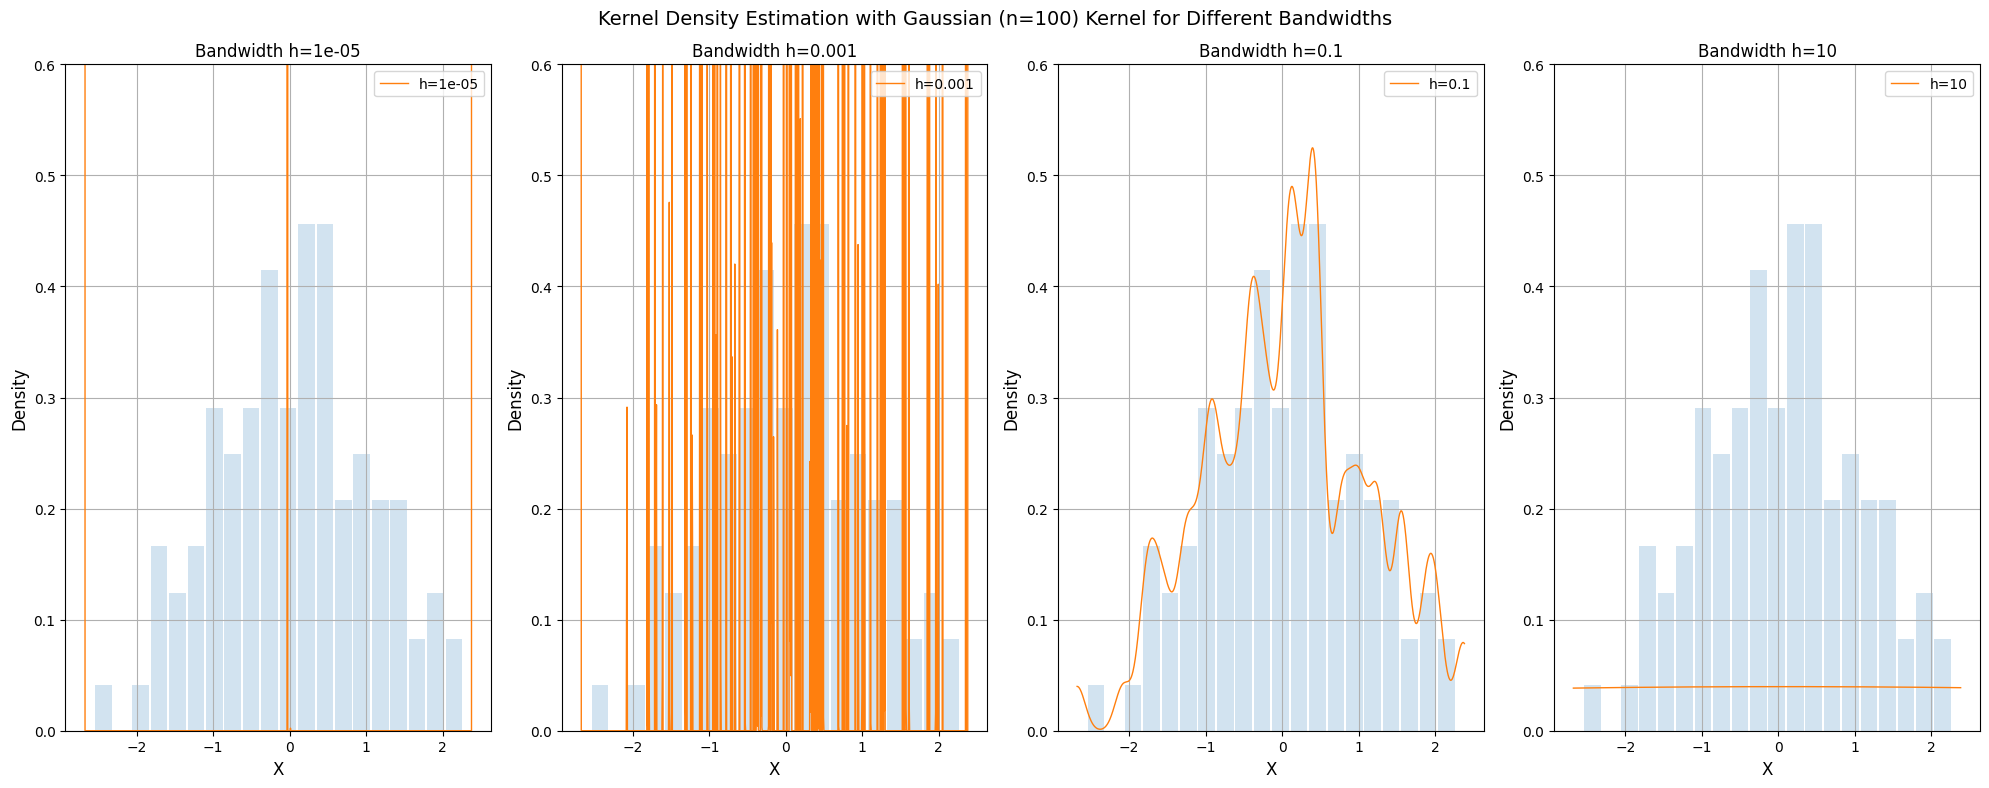

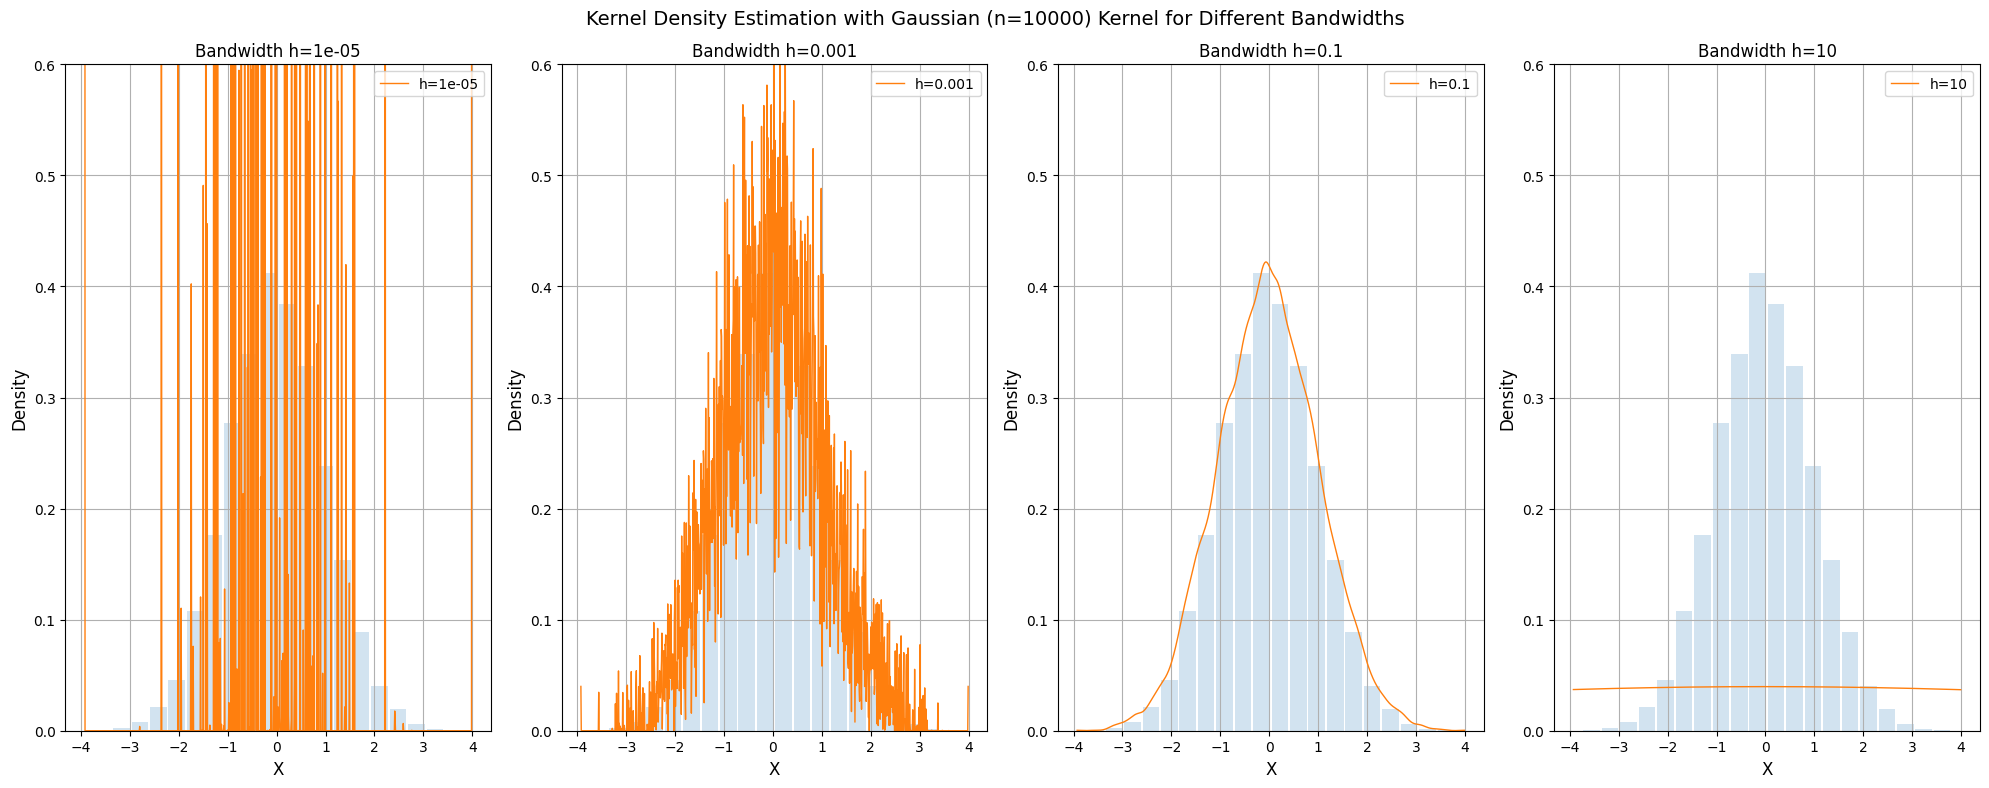

In [52]:
H = [1e-5, 1e-3, 1e-1, 10]
num_data = [100, 10000]
for n in num_data:
    # draw normal data
    data = draw_normal_data(n=n, mean=0, variance=1)
    # compute & plot KDE
    plot_kde(
        data=data, 
        H=H, 
        kernel=gaussian_kernel,
        kernel_name=f"Gaussian (n={n})",
        num_x=num_x,
        x_0=None,
        plot_name=f"1_c_KDE-gaussian_n-{n}.jpg",
        y_lim=0.6
    )

### Conclusion (Visual Comparison)
- From the graphs we notice that the Gaussian kernel provides a much smoother and more accurate approximations compared to the rectangle kernel.
- The effect is more pronounced when we compare Gaussian & Rectangle kernels with fewer data points (`n = 100`).
- Also notice that with more points, distribution `f` of the data becomes more smoother. The smoother `f`, the smoother the kernel should be, and Gaussian kernel is smoother than rectangle kernel, so it does a better job at approximating `f`.


# Part 2

## (a)

In [12]:
def compute_mse(data, dist, x_0, h, kernel, mc_simulations, n):
    """
    Compute MSE for the KDE with a given kernel and bandwidth.

    Parameters
        - data (array-like): Data for which to compute KDE.
        - dist (func): PDF of the data.
        - x_0 (float): Target data point for which MSE is computed.
        - h (float): Bandwidth parameter for the KDE.
        - kernel (func): Kernel function.
        - mc_simulations (int): Number of simulations to perform.
        - n (int): Number of points to draw from normal distribution.

    Returns
        - mse (float): MSE value for the given bandwidth and target point.
    """
    # compute value of the distribution at x_0 
    # (assuming x_0 was drawn from standard normal)
    true_pdf_at_target = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * (x_0**2)) if dist == None else dist.pdf(x_0)
    mse = 0
    for _ in range(mc_simulations):
        # used defined data to compute KDE or draw standard normal data
        x = data if data is not None else draw_normal_data(n=n, mean=0, variance=1)
        # compute KDE estimator
        estimator = kde(x, h, kernel, num_x=None, x_0=x_0)
        # compute MSE_h(x_0)
        mse += (estimator - true_pdf_at_target)**2
    mse /= mc_simulations
    return mse

In [52]:
# define the number of Monte-Carlo simulations
mc_simulations = 100
# define bandwidth values
H = [1e-5, 1e-3, 1e-1, 10]
# define target point
x_0 = -2
# compute MSE for each bandwidth value
mse_values = {}
for h in H:
    mse = compute_mse(
        data=None,
        dist=None,
        x_0=x_0, 
        h=h,
        kernel=rectangle_kernel, 
        mc_simulations=mc_simulations,
        n=100
    )
    mse_values[h] = mse

# find the best bandwidth (accomplishes minimum MSE)
best_h = min(mse_values, key=mse_values.get)
best_mse = mse_values[best_h]

for h, mse in mse_values.items():
    print(f"MSE for h={h}: {mse}")
print(f"For x_0 = {x_0}, Best h: {best_h}, MSE: {best_mse:.6f}")

MSE for h=1e-05: 0.0029150244650281935
MSE for h=0.001: 0.0029150244650281935
MSE for h=0.1: 1.5927813709388483e-05
MSE for h=10: 1.5927813709388483e-05
For x_0 = -2, Best h: 0.1, MSE: 0.000016


## (b)

In [53]:
# define the number of Monte-Carlo simulations
mc_simulations = 100
# define bandwidth values
H = [1e-5, 1e-3, 1e-1, 10]
# define target point
x_0 = 0.1
# compute MSE for each bandwidth value
mse_values = {}
for h in H:
    mse = compute_mse(
        data=None,
        dist=None,
        x_0=x_0, 
        h=h,
        kernel=rectangle_kernel, 
        mc_simulations=mc_simulations,
        n=100
    )
    mse_values[h] = mse

# find the best bandwidth (accomplishes minimum MSE)
best_h = min(mse_values, key=mse_values.get)
best_mse = mse_values[best_h]

for h, mse in mse_values.items():
    print(f"MSE for h={h}: {mse}")
print(f"For x_0 = {x_0}, Best h: {best_h}, MSE: {best_mse:.6f}")

MSE for h=1e-05: 0.1575713249484889
MSE for h=0.001: 0.1575713249484889
MSE for h=0.1: 0.041228267976075046
MSE for h=10: 0.12037607020078811
For x_0 = 0.1, Best h: 0.1, MSE: 0.041228


### Conclusion

- With small values of `h` we will have large variance and small bias, with large values of `h` - small variance and large bias.
- The optimal bandwidth (`h`) for the MSE criterion can vary depending on the target point (`x_0`).
- The value of the standard normal PDF for `x_0 = -2` is low. If we look closely at MSE, each value for each `h` is similar and very low, meaning that even for extremely high and low values of `h`, KDE does a good job at estimating `x_0 = -2`.
- The value of the standard normal PDF for `x_0 = 0.1` is higher than of `x_0 = -2`. This means that the poor choice of `h` will lead to poor estimation. The best value `h` is `0.1` with MSE `0.00013`. We can compare this value with MSE for `h = 1e-05`, which is `0.16` - a much higher error.


## (c)

In [13]:
def compute_dmse(data, dist, target_points, h, kernel, mc_simulations, n):
    """
    Compute DMSE for the KDE with a given kernel and bandwidth.

    Parameters
        - data (array-like): Data for which to compute KDE.
        - dist (func): PDF of the data.
        - target_points (array-like): List of target points x_t to compute DMSE for.
        - h (float): Bandwidth parameter for the KDE.
        - kernel (func): Kernel function.
        - mc_simulations (int): Number of simulations to perform.
        - n (int) : Number of points to draw from normal.

    Returns
        - dmse (float): DMSE value for the given bandwidth and target point.
    """
    # compute mse values for each x_t
    mse_values = [compute_mse(data, dist, x_t, h, kernel, mc_simulations, n) for x_t in target_points]
    # compute dmse
    dmse = np.mean(mse_values)
    return dmse

In [14]:
def plot_dmse(data, dist, target_points, bandwidths, kernel, mc_simulations, n, y_lim, plot_name):
    """
    Plot the DMSE for given bandwidth values.

    Parameters
        - data (array-like): Data for which to compute KDE.
        - dist (func): PDF of the data.
        - target_points (array-like): List of target points x_t to compute DMSE for.
        - bandwidths (array-like): Array of bandwidth values to plot.
        - kernel (func): Kernel function.
        - mc_simulations (int): Number of simulations to perform.
        - n (int) : Number of points to draw from normal.
        - y_lim (float): y limit on the plot.
        - plot_name (str): name of the plot file.

    Returns
        - dmse_values (array-like): DMSE values for each h in H.
    """
    dmse_values = [compute_dmse(data, dist, target_points, h, kernel, mc_simulations, n) for h in bandwidths]
    plt.figure(figsize=(10, 6))
    plt.plot(bandwidths, dmse_values, label='DMSE(h)')
    plt.title('DMSE for given bandwidth values')
    plt.xlabel('Bandwidth (h)')
    plt.ylabel('DMSE')
    plt.grid(True)
    plt.ylim(0, y_lim)
    plt.savefig(plot_name)
    plt.show()

    return dmse_values

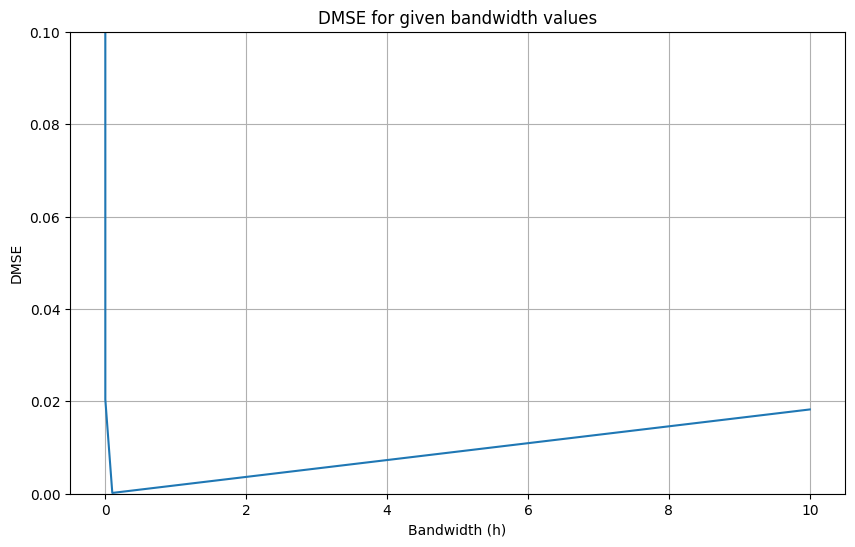

In [71]:
# define the number of Monte-Carlo simulations
mc_simulations = 100
# define target points
T = 200
target_points = [-3+(t+1)*6/mc_simulations for t in range(T)]
# define bandwidths
H = [1e-5, 1e-3, 1e-1, 10]
dmse_values = plot_dmse(
    data=None,
    dist=None,
    target_points=target_points,
    bandwidths=H,
    kernel=gaussian_kernel,
    mc_simulations=mc_simulations,
    n=1000,
    y_lim=0.1,
    plot_name="2_c_DMSE.jpg"
)

In [72]:
for i, dmse in enumerate(dmse_values):
    print(f"DMSE for h={H[i]}: {dmse}")
best_h = H[np.argmin(dmse_values)]
print(f"Best h: {best_h}, DMSE: {min(dmse_values):.5f}")

DMSE for h=1e-05: 0.5685575304418845
DMSE for h=0.001: 0.0203924472923226
DMSE for h=0.1: 0.0001710544487433475
DMSE for h=10: 0.01824021020136728
Best h: 0.1, DMSE: 0.00017


### Conclusion

- The best value for the bandwidth (lowest DMSE) is `h=0.1`.
- The result is consistent with our previous findings: optimal value of `h` provides lowest error for the set of target points amoung other values of `h`.

# Part 3

In [15]:
# define data
n_1 = 200
n_2 = 800
n = n_1 + n_2
mean_1 = 0
variance_1 = 1
mean_2 = 4
variance_2 = 8
data_200 = draw_normal_data(n=n_1, mean=mean_1, variance=variance_1)
data_800 = draw_normal_data(n=n_2, mean=mean_2, variance=variance_2)
data = np.concatenate((data_200, data_800))
# number of points for the KDE x grid
num_x = 1000
# define bandwidth values
H = [1e-5, 1e-3, 1e-1, 10]

# note: the concatenation of two gaussian random variables follows gaussian distribution with:
#   mean_hat: ((n_1 * mean_1) + (n_2 * mean_2)) / (n_1 + n_2)
#   variance_hat: ((variance_1 + mean_1^2) * n_1 + (variance_2 + mean_2^2) * n_2) / (n_1 + n_2) - mean_hat

mean_hat = ((n_1 * mean_1) + (n_2 * mean_2)) / (n_1 + n_2)
variance_hat = ((variance_1 + mean_1^2) * n_1 + (variance_2 + mean_2^2) * n_2) / (n_1 + n_2) - mean_hat
std_hat = np.sqrt(variance_hat)
dist_hat = norm(loc=mean_hat, scale=std_hat)

## (a)

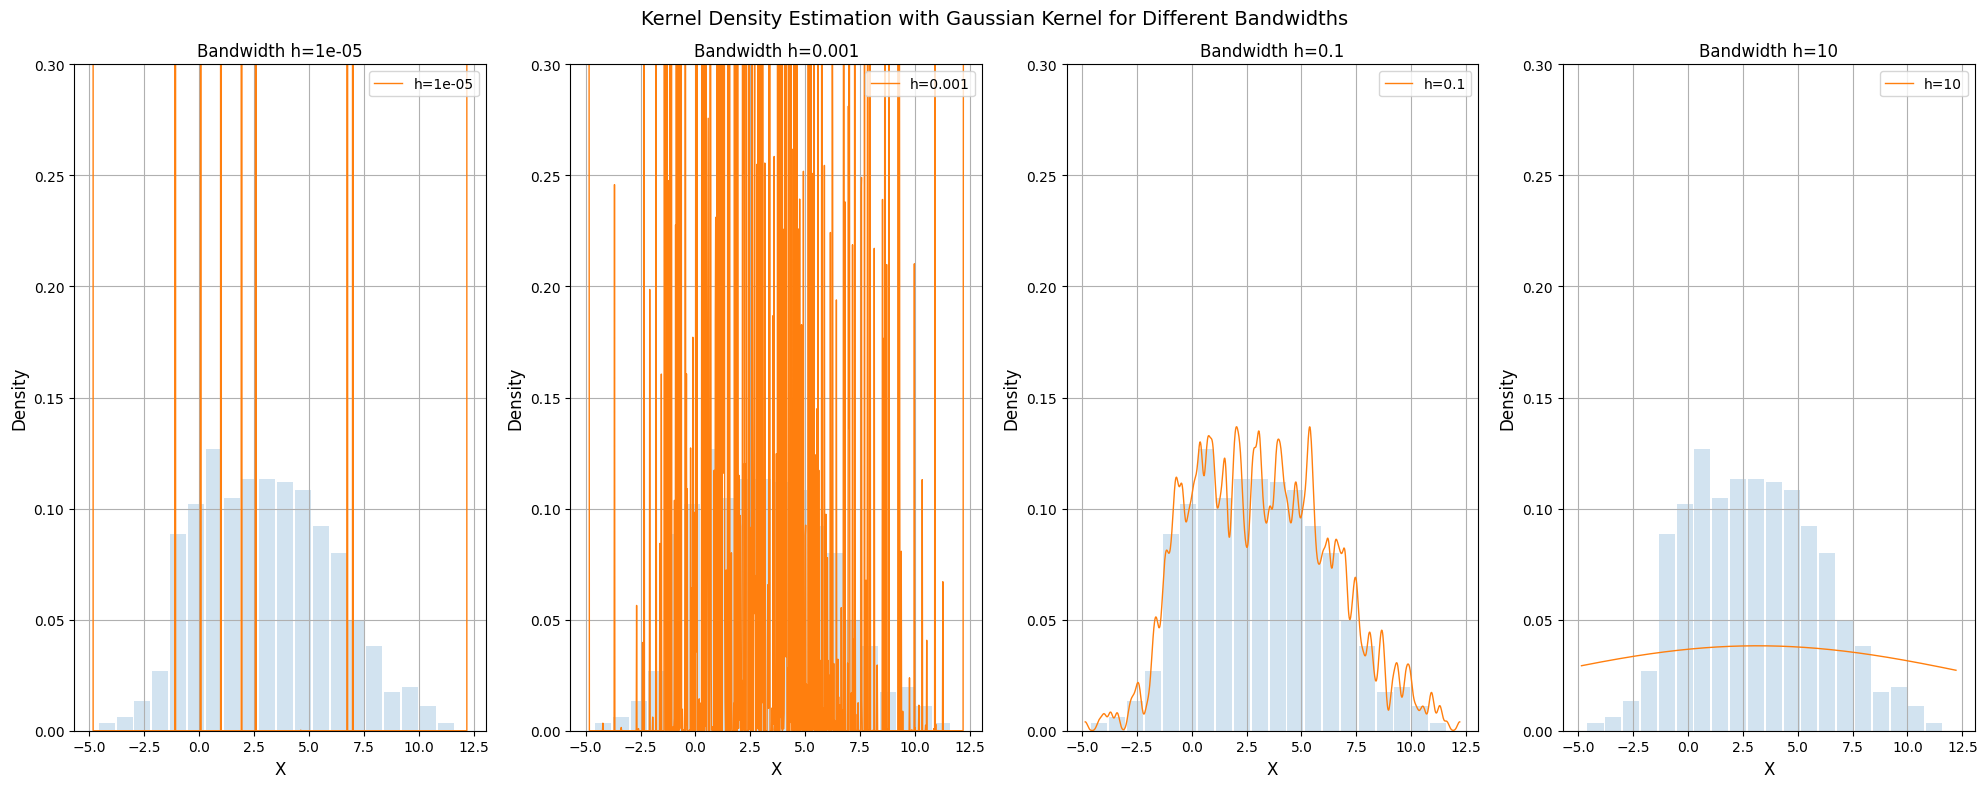

In [46]:
# plot KDE
plot_kde(
    data=data,
    H=H,
    kernel=gaussian_kernel,
    kernel_name="Gaussian",
    num_x=num_x,
    x_0=None,
    plot_name="3_a_KDE.jpg",
    y_lim=0.3
)

## (b)

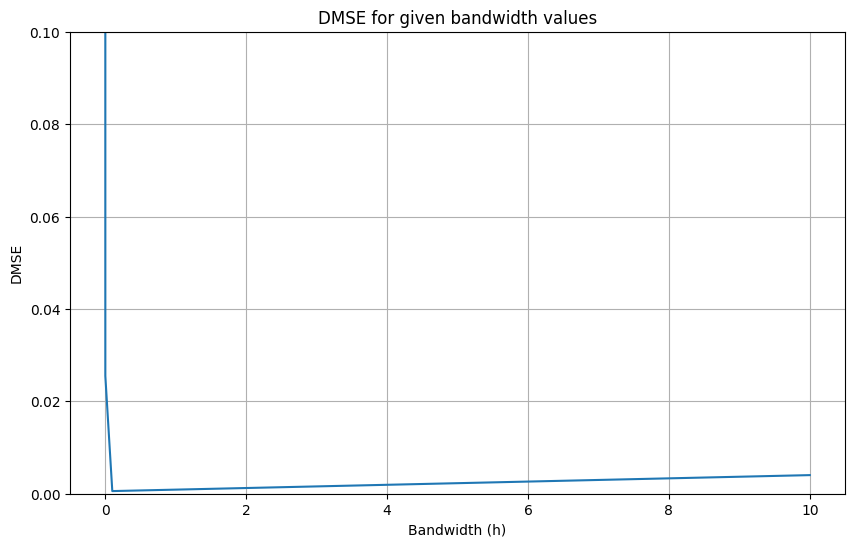

In [16]:
# target points
T = 1000
target_points = [-2+(t+1)*10/len(data) for t in range(T)]
# number of simulations
mc_simulations = 1 # No MC simulations, use data

# plot DMSE
dmse_values = plot_dmse(
    data=data,
    dist=dist_hat,
    target_points=target_points,
    bandwidths=H,
    kernel=gaussian_kernel,
    mc_simulations=mc_simulations,
    n=None,
    y_lim=0.1,
    plot_name="3_b_DMSE.jpg"
)

In [17]:
for i, dmse in enumerate(dmse_values):
    print(f"DMSE for h={H[i]}: {dmse}")
best_h = H[np.argmin(dmse_values)]
print(f"Best h: {best_h}, DMSE: {min(dmse_values):.5f}")

DMSE for h=1e-05: 1.480058803078823
DMSE for h=0.001: 0.02549047452575788
DMSE for h=0.1: 0.0005711953561033517
DMSE for h=10: 0.004026498705284314
Best h: 0.1, DMSE: 0.00057


### Conclusion

- The results are very similar to the case when we were performing Monte-Carlo simulations and computing MSE.
- The best bandwidth value of `h` is `0.1` with DMSE value of `0.0057`.
- As we seen from the graphs, `h=0.1` provides the best approximation to the curve of the data, thus the error that we get is the smallest. It captures the data's features and avoids oversmoothing best among the provided bandwidths values.